# **Hypothesis 1 - Higher Population Areas have worse Air Quality**

## Objectives

* To assess Hypothesis 1 - Higher population areas have worse Air Quality

## Inputs

* The csv file "pollution_us_2012_2016-population-weather.csv"  

## Outputs

* Results from hypothesis testing





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\US_Air_Pollution_Team_2\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ngubo\\Documents\\vscode-projects\\US_Air_Pollution_Team_2'

Importing relevant libraries and New CSV file containing population and weather

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import sklearn as skl

df = pd.read_csv('Dataset/EDA/pollution_us_2012_2016-population-weather.csv')

In [5]:
df.head() # Displaying the first 5 rows of the dataframe

,Address,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,...,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Population,Latitude,Longitude,tmax,prcp,wspd
0,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-01,17.716667,31.0,0,29,0.013667,...,0.336842,0.6,5,7.0,"542,649",31.9681,-111.7806,26.7,0.0,17.6
1,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-02,15.062500,30.6,18,28,0.015083,...,0.225000,0.4,23,5.0,"542,649",31.9681,-111.7806,24.4,0.0,27.4
2,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-03,21.643478,31.0,18,29,0.011417,...,0.295833,0.4,0,5.0,"542,649",31.9681,-111.7806,26.1,0.0,10.8
3,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-04,25.041668,37.8,10,35,0.009208,...,0.345833,0.5,12,6.0,"542,649",31.9681,-111.7806,24.4,0.0,9.0
4,400 W RIVER ROAD,Arizona,Pima,Tucson,2012-01-05,21.981817,37.1,17,35,0.013042,...,0.291667,0.6,23,7.0,"542,649",31.9681,-111.7806,23.9,0.0,9.7


In [6]:
df.info() # Getting information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58158 entries, 0 to 58157
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Address            58158 non-null  object 
 1   State              58158 non-null  object 
 2   County             58158 non-null  object 
 3   City               58158 non-null  object 
 4   Date Local         58158 non-null  object 
 5   NO2 Mean           58158 non-null  float64
 6   NO2 1st Max Value  58158 non-null  float64
 7   NO2 1st Max Hour   58158 non-null  int64  
 8   NO2 AQI            58158 non-null  int64  
 9   O3 Mean            58158 non-null  float64
 10  O3 1st Max Value   58158 non-null  float64
 11  O3 1st Max Hour    58158 non-null  int64  
 12  O3 AQI             58158 non-null  int64  
 13  SO2 Mean           58158 non-null  float64
 14  SO2 1st Max Value  58158 non-null  float64
 15  SO2 1st Max Hour   58158 non-null  int64  
 16  SO2 AQI            581

In [7]:
df.isnull().sum() # Checking for missing values in the dataframe

Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
Population           0
Latitude             0
Longitude            0
tmax                 0
prcp                 0
wspd                 0
dtype: int64

From the Info the Column 'Population' is currently a string with commas and must be converted to integers to run the Hypothesis: Higher population areas have worse air quality	

In [8]:
# Remove commas and convert to integer
df['Population'] = df['Population'].str.replace(',', '').astype(int)

In [9]:
# AQI pollutants list
aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

# Create a new dataframe with Population and AQI pollutants  
df_aqi = df[['Population'] + aqi_pollutants]

# Pearson correlation for each AQI pollutant vs Population
import scipy.stats as stats

for pollutant in aqi_pollutants:
    r, p = stats.pearsonr(df_aqi['Population'], df_aqi[pollutant])
    print(f"{pollutant}: r = {r:.3f}, p = {p:.4f}")

NO2 AQI: r = 0.176, p = 0.0000
SO2 AQI: r = 0.027, p = 0.0000
O3 AQI: r = -0.056, p = 0.0000
CO AQI: r = -0.021, p = 0.0000


# Summary of Hypothesis Test

1. NO₂ AQI
- r = 0.176, p = 0.0000
- Interpretation:
  - Weak positive correlation between population and NO₂ AQI.
  - As population increases, NO₂ levels tend to increase slightly.
  - Statistically significant due to very low p-value (p < 0.001), but the correlation is weak in strength.
- Supports your hypothesis? – Yes, weakly.

2. SO₂ AQI
- r = 0.027, p = 0.0000
- Interpretation:
  - Very weak positive correlation.
  - While statistically significant, the effect is negligible in practice.
- Supports your hypothesis? – Technically yes (statistically), but not meaningfully.

3. O₃ AQI
- r = -0.056, p = 0.0000
- Interpretation:
  - Very weak negative correlation: O₃ AQI slightly decreases as population increases.
  - Statistically significant due to large sample size, but practically very small.
- Supports your hypothesis? – No, slight evidence of the opposite trend.

4. CO AQI
- r = -0.021, p = 0.0000
- Interpretation:
  - Essentially no correlation.
  - Statistically significant (because of large data size), but no practical effect.
- Supports your hypothesis? – No

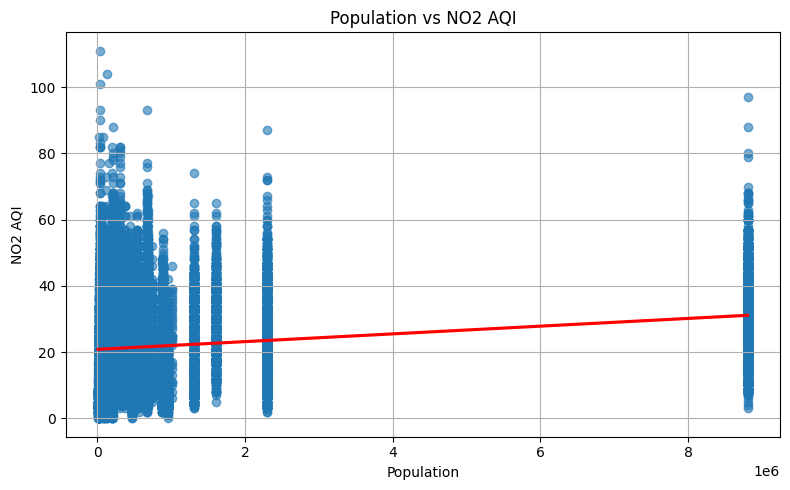

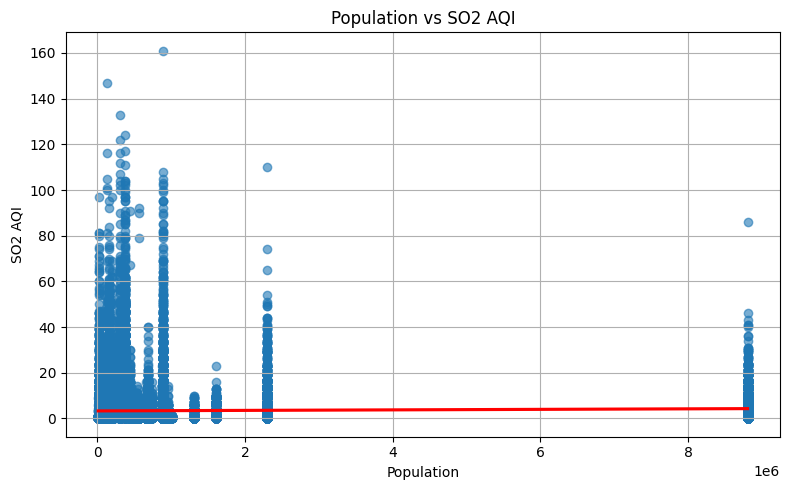

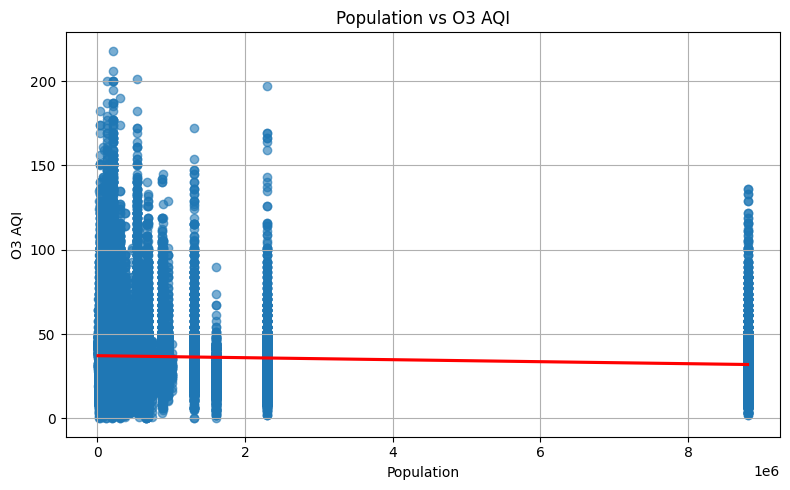

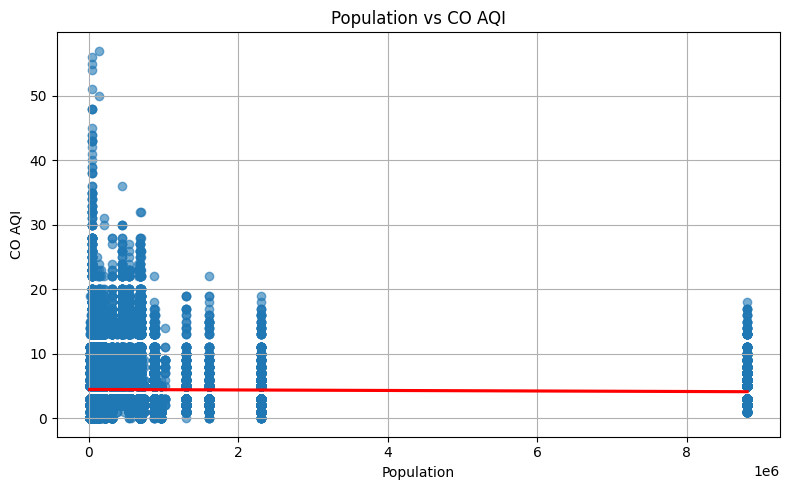

In [10]:
for pollutant in aqi_pollutants:
    plt.figure(figsize=(8, 5))
    sns.regplot(
        x='Population', y=pollutant,
        data=df_aqi,
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    plt.title(f'Population vs {pollutant}')
    plt.xlabel('Population')
    plt.ylabel(pollutant)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graph 1 – Population vs NO₂ AQI

A moderate upward trend (positive correlation).

As population increases, NO₂ AQI also tends to increase noticeably.

# Graph 2 – Population vs SO₂ AQI

Almost no clear trend, and the red regression line is nearly flat.

No meaningful relationship between population and SO₂ AQI.

# Graph 3 – Population vs O₃ AQI

A slight negative trend — O₃ AQI decreases slightly as population increases.

However, this trend is very weak and not statistically significant.

# Graph 4 – Population vs CO AQI

No clear trend at all.

The regression line is flat, indicating no relationship between population and CO AQI.


In [11]:
# Re-importing scipy.stats for clarity
import scipy.stats as stats
aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']

for pollutant in aqi_pollutants:
    r, p = stats.pearsonr(df_aqi['Population'], df_aqi[pollutant])
    print(f"{pollutant}: r = {r:.3f}, p = {p:.4f}")

NO2 AQI: r = 0.176, p = 0.0000
SO2 AQI: r = 0.027, p = 0.0000
O3 AQI: r = -0.056, p = 0.0000
CO AQI: r = -0.021, p = 0.0000


Plot Population Bins

In [12]:
# Define bins for rural, suburban, urban
bins = [0, 50000, 500000, df_aqi['Population'].max()]
labels = ['Rural', 'Suburban', 'Urban']

df_aqi.loc[:, 'Population_Bin'] = pd.cut(df_aqi['Population'], bins=bins, labels=labels)

C:\Users\ngubo\AppData\Local\Temp\ipykernel_30140\3865907394.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi.loc[:, 'Population_Bin'] = pd.cut(df_aqi['Population'], bins=bins, labels=labels)


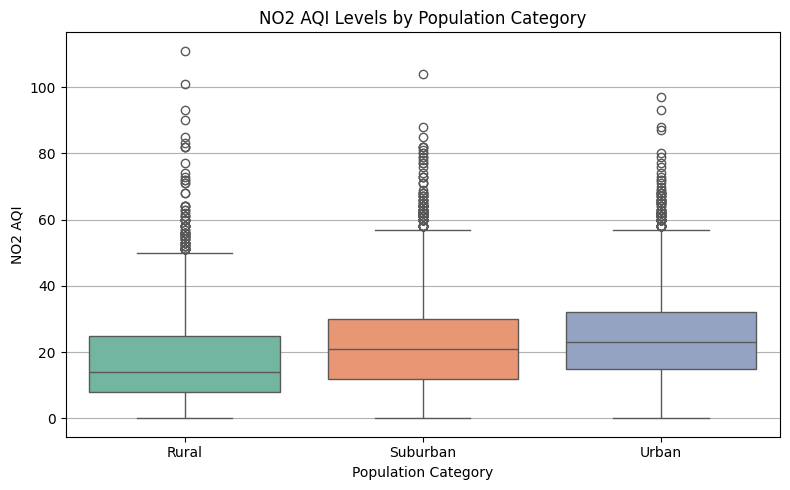

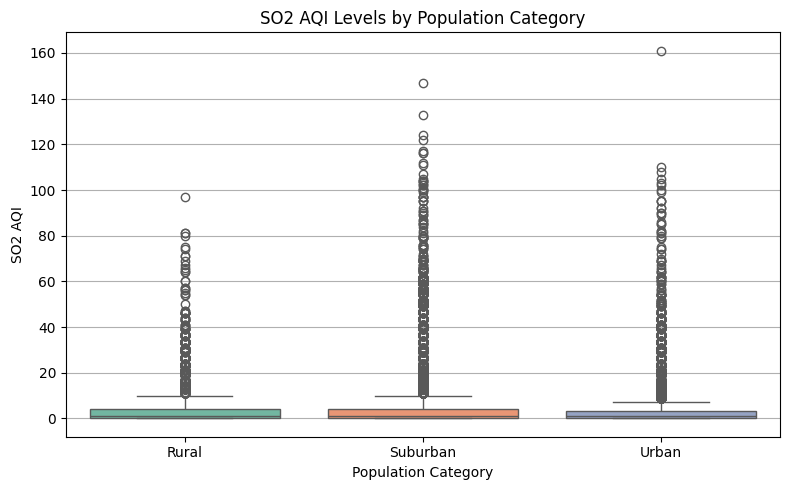

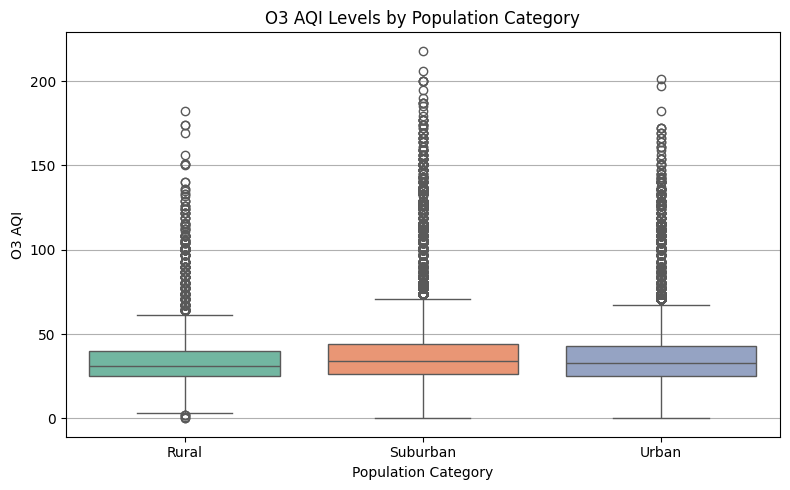

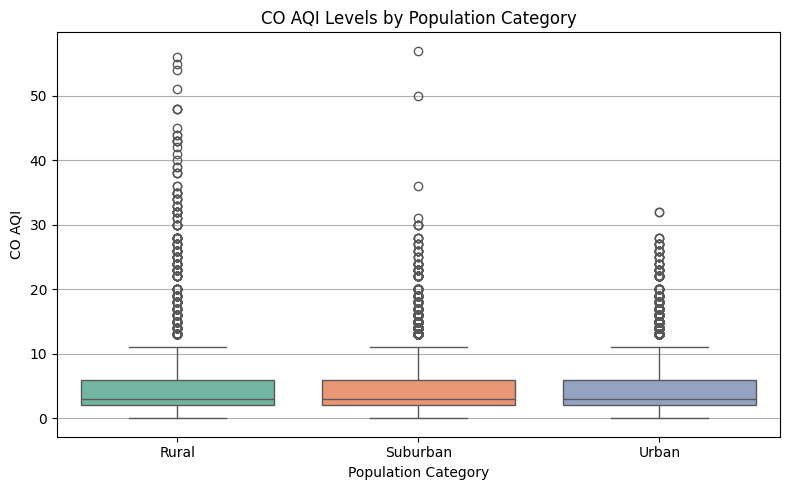

In [13]:
# Plot boxplots for each pollutant by population bin with enhanced styling
for pollutant in aqi_pollutants:
    plt.figure(figsize=(8,5))
    ax = sns.boxplot(
        x='Population_Bin',
        y=pollutant,
        hue='Population_Bin',
        data=df_aqi,
        palette='Set2',
        dodge=False
    )
    plt.title(f'{pollutant} Levels by Population Category')
    plt.xlabel('Population Category')
    plt.ylabel(pollutant)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Box Plots

NO₂ AQI
- Trend: Median and overall distribution of NO₂ AQI increases from Rural → Suburban → Urban.

- Interpretation: Urban areas tend to have higher NO₂ pollution, likely due to more traffic, industrial activity, and dense infrastructure.

- Spread & Outliers: Although urban areas show more consistently higher values, the highest individual outlier actually appears in a rural area.
- This suggests that some rural locations may experience extreme NO₂ events, possibly due to local industrial sites, burning, or data irregularities — even if such events are rare.

SO₂ AQI
- Trend: Suburban and urban areas show slightly higher median SO₂ AQI compared to rural areas.

- Interpretation: This could suggest that SO₂ pollution sources — such as power plants, industrial facilities, or shipping routes — may be more concentrated near suburban and urban zones.

- Spread & Outliers: The highest SO₂ AQI outlier is found in an urban area, showing that although the medians are similar, some urban locations experience extreme SO₂ levels — possibly due to local industrial activity or isolated events.

O₃ AQI
- Trend: Medians for suburban and urban areas are quite close, with rural areas slightly lower on average.

- Interpretation: This suggests that ozone pollution doesn't vary much by population size in your data. Since ozone is a secondary pollutant (formed by chemical reactions in the atmosphere), it's often influenced more by regional weather patterns and sunlight than just local emissions.

- Spread & Outliers: Suburban areas show the highest outlier, indicating that ozone spikes can occur outside of major urban centers, possibly due to specific environmental or traffic conditions.

CO AQI
- Trend: Medians and overall distributions are similar across Rural and Suburban areas, with Urban showing a slightly tighter spread.

- Interpretation: Carbon monoxide levels appear to be relatively stable across population categories, suggesting widespread sources like vehicle emissions and residential heating that don’t scale dramatically with population.

- Spread & Outliers: Suburban areas have the single highest outlier in CO AQI. However, Rural areas show more frequent high outliers, suggesting occasional spikes, possibly from localized sources like wildfires, agricultural burning, or small industrial operations.

The Kruskal-Wallis test is a non-parametric method used when the data may not be normally distributed. In this case, it's suitable because we're comparing AQI levels (for pollutants like NO₂, SO₂, O₃, and CO) across three independent population categories: Rural, Suburban, and Urban.

In [18]:
# Kruskal-Wallis H-test for independent samples
from scipy.stats import kruskal

aqi_pollutants = ['NO2 AQI', 'SO2 AQI', 'O3 AQI', 'CO AQI']
population_groups = ['Rural', 'Suburban', 'Urban']

# List to hold results
results = []

for pollutant in aqi_pollutants:
    groups = [df_aqi[df_aqi['Population_Bin'] == group][pollutant].dropna() 
              for group in population_groups]
    stat, p = kruskal(*groups)
    results.append({'Pollutant': pollutant, 'H-statistic': stat, 'p-value': p})

# Convert to DataFrame
results_df = pd.DataFrame(results)

print(results_df)

  Pollutant  H-statistic        p-value
0   NO2 AQI  2508.055693   0.000000e+00
1   SO2 AQI   964.813553  3.114575e-210
2    O3 AQI   238.887851   1.337095e-52
3    CO AQI   220.311374   1.445416e-48


All p-values are well below 0.05, meaning:

There are statistically significant differences in AQI values across the population bins (Rural, Suburban, Urban) for all four pollutants.

---

# **Conclusion**

- NO₂ AQI had a very high H-statistic and a p-value of 0.000, suggesting strong evidence of a significant difference between at least two population groups.

- SO₂ AQI also showed a statistically significant difference, though slightly less pronounced.

- O₃ AQI and CO AQI both had statistically significant results, indicating differences in pollution levels across population categories, but with smaller effect sizes compared to NO₂.

Overall, these results support the hypothesis that urbanization (higher population) is associated with worse air quality, at least for some pollutants — particularly NO₂, which is commonly linked to vehicle emissions and urban activity.

---